In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering as AC


In [231]:
def GetColors(N, map_name='rainbow'):
    '''Function returns a list of N colors from a matplotlib colormap
            Input: N = number of colors, and map_name = name of a matplotlib colormap
    
            For a list of available colormaps: 
                https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    '''
    
    import matplotlib
    import numpy as np
    cmap = matplotlib.cm.get_cmap(map_name)
    n = np.linspace(0,N,N)/N
    return cmap(n)

def PlotGroups(points, groups, colors, ec='black', ax='None'):
    '''Function makes a scatter plot, given:
            Input:  points (array)
                    groups (an integer label for each point)
                    colors (one rgb tuple for each group)
                    ec (edgecolor for markers, default is black)
                    ax (optional handle to an existing axes object to add the new plot on top of)
            Output: handles to the figure (fig) and axes (ax) objects
    '''
    import matplotlib.pyplot as plt
    # Create a new figure if none was passed
    if ax == 'None':
        fig,ax = plt.subplots()
    else:
        fig = plt.gcf()
        
    for i in np.unique(groups):
        idx = (groups==i)
        ax.scatter(points[idx,0], points[idx,1],
                    color=colors[i],edgecolor=ec,
                    label = 'Group ' + str(i), alpha=0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend(bbox_to_anchor=[1,0.5],loc='center left')
    return fig,ax

def CompareClasses(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    
    import pandas as pd
    accuracy = sum(actual==predicted)/actual.shape[0]
    classes = pd.DataFrame(columns=['Actual','Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted
    conf_mat = pd.crosstab(classes['Predicted'],classes['Actual'])
    # Relabel the rows/columns if names was provided
    if type(names) != type(None):
        conf_mat.index=names
        conf_mat.index.name='Predicted'
        conf_mat.columns=names
        conf_mat.columns.name = 'Actual'
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,**kwargs)
    # Add axis labels
    plt.xlabel('Data Point')
    plt.ylabel('Distance')

In [232]:
from sklearn.datasets import load_iris

load iris data set

In [233]:
iris_data = load_iris()
X = iris_data.data
X_names = iris_data.feature_names
y = iris_data.target
y_names = iris_data.target_names

In [234]:
X.shape

(150, 4)

# Agglomerative Hierarchical Clustering

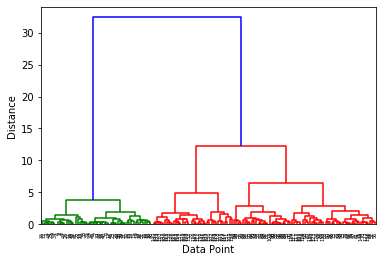

In [235]:
n= 3

ac = AC(n_clusters=None, distance_threshold=0)
ac.fit(X)
plot_dendrogram(ac)
plt.show()
#clearly shows it should be 3 clustters

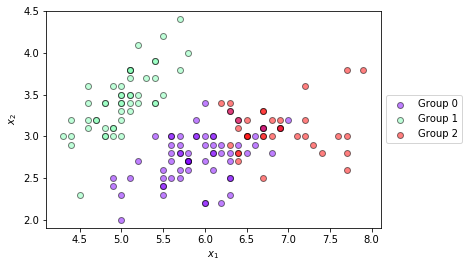

In [236]:
ac = AC(n_clusters = n)
y_pred = ac.fit_predict(X)

colors = GetColors(n)
PlotGroups(X, y_pred, colors)
plt.axis('equal')
plt.show()

In [237]:
#without anything and non standardized
y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0

CompareClasses(y, y_pred_adj)

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  49  15
 2           0   1  35, 0.8933333333333333)

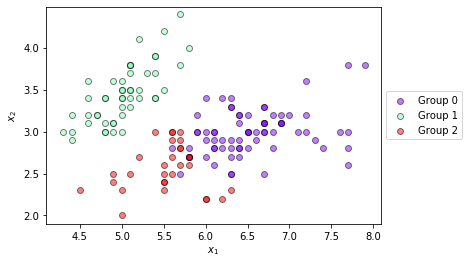

Accuracy = 0.83


(Actual      0   1   2
 Predicted            
 0          49   0   0
 1           1  27   2
 2           0  23  48, 0.8266666666666667)

In [238]:
#normal with standardized 
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
Xs = ss.fit_transform(X)
ac = AC(n_clusters = n)
y_pred = ac.fit_predict(Xs)

colors = GetColors(n)
PlotGroups(X, y_pred, colors)
plt.axis('equal')
plt.show()

y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 2
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 1

CompareClasses(y, y_pred_adj)

In [239]:
from sklearn.decomposition import PCA
pca = PCA()
Xp = pca.fit_transform(X)

ac = AC(n_clusters = n)
y_pred = ac.fit_predict(Xp)

In [240]:
y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0

CompareClasses(y, y_pred_adj)

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  49  15
 2           0   1  35, 0.8933333333333333)

In [241]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
Xs = ss.fit_transform(X)
pca = PCA()
Xp = pca.fit_transform(Xs)

ac = AC(n_clusters = n)
y_pred = ac.fit_predict(Xp)
y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 2
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 1

CompareClasses(y, y_pred_adj)

Accuracy = 0.83


(Actual      0   1   2
 Predicted            
 0          49   0   0
 1           1  27   2
 2           0  23  48, 0.8266666666666667)

In [242]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=146)
Xt = tsne.fit_transform(X)

ac = AC(n_clusters = n)
y_pred = ac.fit_predict(Xt)

In [243]:
y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0

CompareClasses(y, y_pred_adj)

Accuracy = 0.91


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  50  14
 2           0   0  36, 0.9066666666666666)

In [244]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
Xs = ss.fit_transform(X)
tsne = TSNE(random_state=146)
Xt = tsne.fit_transform(Xs)

ac = AC(n_clusters = n)
y_pred = ac.fit_predict(X)
y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

CompareClasses(y, y_pred_adj)

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  49  15
 2           0   1  35, 0.8933333333333333)

# KMeans

In [245]:
from sklearn.cluster import KMeans
k = 3
km = KMeans(n_clusters=k, random_state=146)
y_pred = km.fit_predict(X)
CompareClasses(y, y_pred)

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  48  14
 2           0   2  36, 0.8933333333333333)

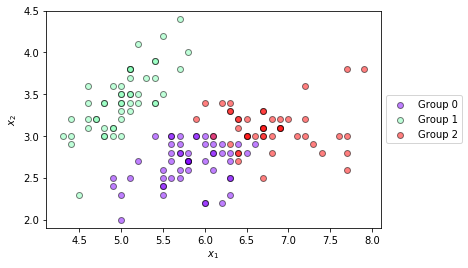

Accuracy = 0.83


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  39  14
 2           0  11  36, 0.8333333333333334)

In [246]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
Xs = ss.fit_transform(X)
km = KMeans(n_clusters=k, random_state=146)
y_pred = km.fit_predict(Xs)

colors = GetColors(n)
PlotGroups(X, y_pred, colors)
plt.axis('equal')
plt.show()

y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

CompareClasses(y, y_pred_adj)

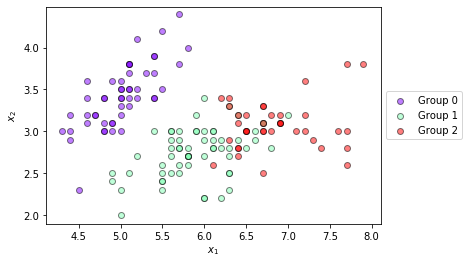

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  48  14
 2           0   2  36, 0.8933333333333333)

In [247]:
from sklearn.decomposition import PCA
pca = PCA()
Xp = pca.fit_transform(X)

km = KMeans(n_clusters=k, random_state=146)
y_pred = km.fit_predict(Xp)

colors = GetColors(n)
PlotGroups(X, y_pred, colors)
plt.axis('equal')
plt.show()

y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 0
y_pred_adj[idx1] = 1
y_pred_adj[idx2] = 2

CompareClasses(y, y_pred_adj)

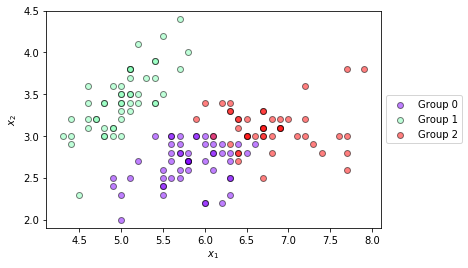

Accuracy = 0.83


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  39  14
 2           0  11  36, 0.8333333333333334)

In [248]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
Xs = ss.fit_transform(X)
pca = PCA()
Xp = pca.fit_transform(Xs)

km = KMeans(n_clusters=k, random_state=146)
y_pred = km.fit_predict(Xp)
y_pred_adj = y_pred.copy()

colors = GetColors(n)
PlotGroups(X, y_pred, colors)
plt.axis('equal')
plt.show()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

CompareClasses(y, y_pred_adj)

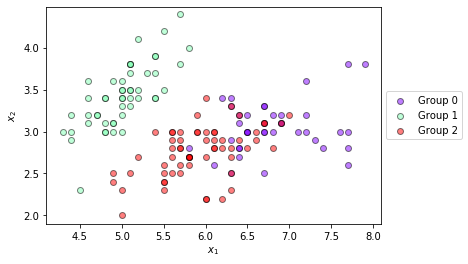

Accuracy = 0.91


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  49  12
 2           0   1  38, 0.9133333333333333)

In [249]:
tsne = TSNE(random_state=146)
Xt = tsne.fit_transform(X)

km = KMeans(n_clusters=k, random_state=146)
y_pred = km.fit_predict(Xt)
y_pred_adj = y_pred.copy()


colors = GetColors(n)
PlotGroups(X, y_pred, colors)
plt.axis('equal')
plt.show()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 2
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 1

CompareClasses(y, y_pred_adj)

In [250]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
Xs = ss.fit_transform(X)
tsne = TSNE(random_state=146)
Xt = tsne.fit_transform(Xs)

ac = AC(n_clusters = n)
y_pred = ac.fit_predict(X)
y_pred_adj = y_pred.copy()

idx0 = y_pred==0
idx1 = y_pred==1
idx2 = y_pred==2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

CompareClasses(y, y_pred_adj)

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  49  15
 2           0   1  35, 0.8933333333333333)

# DBSCAN

In [251]:
from sklearn.cluster import DBSCAN
e = 1
m = 4

db = DBSCAN(eps=e, min_samples=m)
clusters = db.fit_predict(X)
print(len(np.unique(clusters)))

2


In [252]:
tsne = TSNE(random_state=146)
Xt = tsne.fit_transform(X)

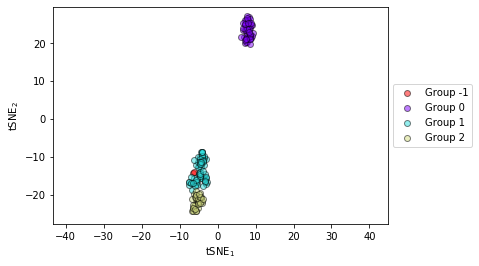

In [253]:
e = 1.35
m = 4

db = DBSCAN(eps=e, min_samples=m)
clusters = db.fit_predict(Xt)

n = len(np.unique(clusters))
colors = GetColors(n)
PlotGroups(Xt, clusters, colors)
plt.axis('equal')
plt.xlabel('tSNE$_1$')
plt.ylabel('tSNE$_2$')
plt.show()

In [254]:
len(clusters[clusters== 2])

35

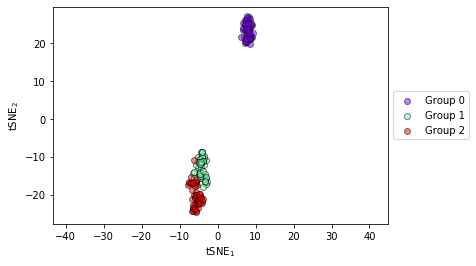

In [255]:

n = len(np.unique(y))
colors = GetColors(n)
PlotGroups(Xt, y, colors)
plt.axis('equal')
plt.xlabel('tSNE$_1$')
plt.ylabel('tSNE$_2$')
plt.show()

In [256]:
print(np.unique(clusters))
print(np.unique(y))

[-1  0  1  2]
[0 1 2]


In [257]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [258]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,  1,  1,  2,  2,  2,  2,
        1,  2,  1,  2,  1,  2,  2,  1,  1,  2,  2,  2,  2,  2,  1,  1,  2,
        2,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1])

In [259]:
cluster = []
y_2 = []
for i,idx in zip(clusters, y):
    if i != -1:
        cluster.append(i)
        y_2.append(idx)
cluster=np.array(cluster)
y_2 = np.array(y_2)
print(cluster)
print(y_2)
print(sum(y_2==cluster))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2
 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
133


In [260]:
CompareClasses(y_2, cluster)

Accuracy = 0.90


(Actual      0   1   2
 Predicted            
 0          50   0   0
 1           0  48  15
 2           0   0  35, 0.8986486486486487)

In [261]:
idx0 = clusters== 0
idx1 = clusters==1
idx2 = clusters==2

clusters[idx0] = 0
clusters[idx1] = 1
clusters[idx2] = 2

CompareClasses(y, clusters)

Accuracy = 0.89


(Actual      0   1   2
 Predicted            
 -1          0   2   0
  0         50   0   0
  1          0  48  15
  2          0   0  35, 0.8866666666666667)